## Rare v.s. Common words

As mentioned in the *question* section of the README.md, I think how often the author uses rare words in the fanfic demonstrate the writing styles and could be a differentiation factor. Thus, here is a exploration done on the rare words frequency. 

**Data Loading**

In [1]:
from dataloader import *

Data from "data/ao3.p" loaded. Document Size: 31034. System Memory: 1222.04mb


In [2]:
import pandas as pd
import pickle
import numpy as np
from collections import Counter, defaultdict
from itertools import chain
import re
from sys import getsizeof
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tqdm.notebook import trange, tqdm

In [3]:
print_fanfic(0, True, 500)


[0]('30843428', 'nervous by nature and overthinking everything') Teen And Up Audiences
['Minecraft (Video Game)', 'Dream SMP - Fandom', 'Video Blogging RPF']
https://archiveofourown.org/works/30843428
['Angst', 'Angst with a Happy Ending', 'Kinda', 'Arguing', 'Fighting', 'Traumatized TommyInnit (Video Blogging RPF)', 'Resurrected TommyInnit (Video Blogging RPF)', 'Protective TommyInnit (Video Blogging RPF)', 'Ranboo Has Anxiety Disorder (Video Blogging RPF)', 'Ranboo & TommyInnit Friendship (Video Blogging RPF)', 'Ranboo Has a Tail (Video Blogging RPF)', 'Sad Ranboo (Video Blogging RPF)', 'Nonbinary Ranboo (Video Blogging RPF)', 'Mentioned Toby Smith | Tubbo', 'Platonically Married Ranboo and Toby Smith | Tubbo', 'All Platonic - Freeform', 'you fuckers', 'Unhealthy Coping Mechanisms', 'Canon Compliant']


It was calm, that night in the tower. The kind of calm that came after a day of uneventful happenings, a feeling of peace that grew the longer into the evening it went. On the SMP, d

**Let's begin**

we only care about the proper English words in the dictionary, so we will get a list of English words

In [5]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words

en_vocab = set(words.words())

TF-IDF to get tokens in the corpus

In [117]:
vectorizer = TfidfVectorizer(
    min_df=1,
    stop_words='english'
)
T = vectorizer.fit_transform(corpus)

In [118]:
f'Corpus has {T.shape[0]} documents with a vocab size of {T.shape[1]}'

'Corpus has 31034 documents with a vocab size of 193995'

In [122]:
doc_terms = vectorizer.inverse_transform(T)

In [123]:
word_to_ix = vectorizer.vocabulary_
ix_to_word = {i : w for w, i in word_to_ix.items()}

Some rare words ranking based on their idf score

In [125]:
from wordfreq import zipf_frequency

for i in np.argsort(-vectorizer.idf_)[:250]:
    if ix_to_word[i] in en_vocab:
        print(ix_to_word[i], vectorizer.idf_[i], zipf_frequency(ix_to_word[i], 'en'))

morphology 10.649723698287808 3.41
morpheme 10.649723698287808 2.28
morosity 10.649723698287808 0.0
moroseness 10.649723698287808 0.0
mosasaur 10.649723698287808 1.5
mortise 10.649723698287808 2.16
morin 10.649723698287808 2.65
motorcyclist 10.649723698287808 2.74
motionlessness 10.649723698287808 0.0
motile 10.649723698287808 2.33
mott 10.649723698287808 3.0
motte 10.649723698287808 2.5
mountainously 10.649723698287808 0.0
mountained 10.649723698287808 0.0
mouflon 10.649723698287808 1.29
mouche 10.649723698287808 1.7
motherwort 10.649723698287808 1.02
moste 10.649723698287808 1.24
motherlessness 10.649723698287808 0.0


import wordfreq library to get common frequencies of English words. general method is averaging the frequency of each unique word in a document to get average frequency of this document

In [126]:
doc_freq = {}
for i, doc in enumerate(tqdm(doc_terms[:])):
    freq, total_count = 0, 0
    for term in doc:
        if term in en_vocab:
            freq += zipf_frequency(term, 'en')
            total_count += 1
    doc_freq[i] = freq / (total_count + 1e-10)

  0%|          | 0/31034 [00:00<?, ?it/s]

In [150]:
def rank_by_idf(doc_id):
    return [
        term for term in \
            sorted(doc_terms[doc_id], key=lambda x:zipf_frequency(x, 'en')) \
                if term in en_vocab
    ]

print('Rarest words in document 10:')
rank_by_idf(10)[:10]

Rarest words in document 10:


['keened',
 'insufferableness',
 'rhythmless',
 'demandingly',
 'reservedly',
 'uncrossable',
 'bedmate',
 'uncorking',
 'growly',
 'enticingly']

**analysis**

In [128]:
def custom_corpus_freq(fn):
    text = open(fn, 'r+', encoding='utf-8').read()
    u = vectorizer.transform([text])
    u_terms = vectorizer.inverse_transform(u)[0]
    
    total_count, freq = 0, 0
    for term in u_terms:
        if term in en_vocab:
            total_count += 1
            freq += zipf_frequency(term, 'en')
    return freq / total_count

rarity rank of documents (scoare 0.0 indicate the documents are not in English but are accidentally tagged as English)

In [129]:
print('Rare documents:')
for doc_id, freq in sorted(doc_freq.items(), key=lambda x:x[1])[:10]:
    print(doc_id, freq)

print('\nCommon documents:')
for doc_id, freq in sorted(doc_freq.items(), key=lambda x:-x[1])[:10]:
    print(doc_id, freq)


print('\nAs some points of comparsion...')
for name, fn in [
    ('Ulysses', 'text/ulysses.txt'),
    ('Moby Dick', 'text/moby dick.txt'),
    ('Emma', 'text/emma.txt'),
    ('Les Misérables', 'text/les mis.txt'),
    ('Keeping Up With the Kardashians', 'text/kardashians.txt'),
    ]:
    print(f"Average word freq for \"{name}\" is {custom_corpus_freq(fn)}")

Rare documents:
4761 0.0
11937 0.0
15363 0.0
28504 3.231933962262628
4422 3.377213114748562
21417 3.4609210526270253
20284 3.8099999998095
26457 3.8585291631442225
9616 3.8775100942121283
3044 3.9127304964536975

Common documents:
19962 5.261739130411906
30367 5.243831775696035
4396 5.224285714273274
27337 5.222727272717776
29285 5.221304347818521
8620 5.178695652166408
284 5.171666666658047
4430 5.14901408449979
4429 5.144593023252824
16842 5.138163265295636

As some points of comparsion...
Average word freq for "Ulysses" is 3.947067729083665
Average word freq for "Moby Dick" is 4.09605399792315
Average word freq for "Emma" is 4.237152087475149
Average word freq for "Les Misérables" is 4.2670489038785755
Average word freq for "Keeping Up With the Kardashians" is 4.74099125364432


Some examaples of fanfics with rare words

In [136]:
print_fanfic(26457, True, 500)
print_fanfic(9616, True, 500)
print_fanfic(3044, True, 500)


[26457]('30766190', 'A (random) study of the (partial) alphabet') Mature
['Bridgerton Series - Julia Quinn', 'Bridgerton (TV)']
https://archiveofourown.org/works/30766190
['Fluff and Angst', 'Family Dynamics', 'Family Feels', 'Regency', 'Kate and Benedict: art pals for life', 'Jealous Anthony Bridgerton', 'heartbroken Violet Bridgerton', 'Implied Polin', 'rare Francesca sighting', 'Eloise and Kate: partners in crime', 'Anthony Bridgerton: surrogate father to Hyacinth and Gregory', 'Romance', 'Soft Feels', 'Bridgertons Being Bridgertons', 'emotional Anthony', 'Comfort', 'Kate and Anthony providing each other comfort', 'Anthony Bridgerton: besotted with Kate Sharma since 1814', 'Newton chasing rabbits', 'In upcoming 2nd chapter: Kate gets on her knees for a non-key related reason ;)', 'Gregory Bridgerton’s 1st crush was Kate Sharma', '2nd-chapter Anthony could’ve written “Slipping Through My Fingers” from Mamma Mia']

Kate had always considered herself an innately observant person. Over

some examples of fanfics with common words

In [196]:
print_fanfic(8620, True, 500)
print_fanfic(30367, True, 500)
print_fanfic(29285, True, 500)


[8620]('29770200', 'Wonderland Monologues') Mature
['Durarara!!']
https://archiveofourown.org/works/29770200
['monologues', 'Jail', 'thoughts', 'Familiars', 'Apocalypse game', 'Worry', 'Misery']


Chapter Text
Wonderland MonologuesWalkerI have been in jail for… Oh, I don't know anymore. I have been here for a while now. To be honest with you, I am not really worried about it. I have seen people come in and out of here. Some of them tough and some of them look so scared to be here. I just sit in my cell and watch. What else can I do? They took my phone. There's no manga or anime here either.Erika always comes by to see me once a week. I know that she is worried about me. She wants to help

[30367]('30809168', 'wish you were here') Teen And Up Audiences
['Video Blogging RPF', 'Minecraft (Video Game)']
https://archiveofourown.org/works/30809168
['EpicSMP', 'Ambiguous/Open Ending', 'Epistolary', 'Texting', 'Angst', 'Alternate Universe - Canon Divergence']


Chapter Text

<TedNivison> Hey 

some basic stats giving an overview of the distribution. We can see that the average is 4.6 anywhere between 4.5~4.7 is normal for a fanfic. something close to 4.2 or close to 5.0 would be outliers

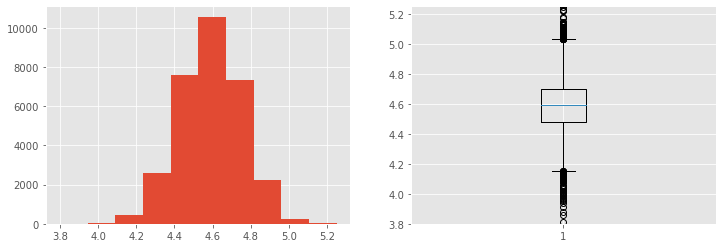

In [139]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(doc_freq.values(), range=(3.8, 5.25))

axs[1].boxplot(doc_freq.values())
axs[1].set_ylim((3.8, 5.25))

plt.show(fig)

some fandom statistics because why not

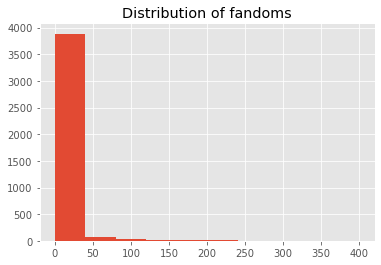

In [198]:
fandom_counter = Counter(chain.from_iterable(fandoms))
plt.title('Distribution of fandoms')
plt.hist(fandom_counter.values(), range=(0, 400))
plt.show()

In [199]:
print('Top 10 Fandom community')
sorted(fandom_counter.items(), key=lambda x:-x[1])[:10]

Top 10 Fandom community


[('僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia', 1470),
 ('Video Blogging RPF', 1337),
 ('Minecraft (Video Game)', 1297),
 ('Harry Potter - J. K. Rowling', 1051),
 ('Marvel Cinematic Universe', 1033),
 ('Haikyuu!!', 977),
 ('방탄소년단 | Bangtan Boys | BTS', 942),
 ('原神 | Genshin Impact (Video Game)', 749),
 ('NCT (Band)', 513),
 ('Star Wars - All Media Types', 513)]

In [200]:
labels, count = zip(*[(key, count) for key, count in fandom_counter.items() if count > 50])
print(f'{len(labels) * 100 / len(fandom_counter):.2f}% fandom communities account for {sum(count) * 100 / len(df):.2f}% of fanfictions.')

3.26% fandom communities account for 84.38% of fanfictions.


The above is a rough estimate, because one fanfic can belong to multiple fandoms. Let's compute the average freq of each fandom

In [143]:
fandom_freq = {key: [] for key, count in fandom_counter.items() if count > 50}
for doc_id, ave_freq in doc_freq.items():
    for f in fandoms[doc_id]:
        if f in fandom_freq:
            fandom_freq[f].append(ave_freq)
fandom_freq = {key: sum(freq_list) / len(freq_list) for key, freq_list in fandom_freq.items()}

In [144]:
print('Top 20 fandoms using rare words')
for fandom, ave_freq in sorted(fandom_freq.items(), key=lambda x:x[1])[:20]:
    print(fandom, fandom_counter[fandom], round(ave_freq, 3))

print('\nTop 20 fandoms using common words')
for fandom, ave_freq in sorted(fandom_freq.items(), key=lambda x:-x[1])[:20]:
    print(fandom, fandom_counter[fandom], round(ave_freq, 3))

Top 20 fandoms using rare words
The Terror (TV 2018) 53 4.41
The Silmarillion and other histories of Middle-Earth - J. R. R. Tolkien 62 4.44
Final Fantasy XIV 78 4.442
Dragon Age: Inquisition 80 4.476
Dragon Age (Video Games) 79 4.482
Hades (Video Game 2018) 70 4.495
Dragon Age - All Media Types 55 4.5
Compilation of Final Fantasy VII 76 4.505
天官赐福 - 墨香铜臭 | Tiān Guān Cì Fú - Mòxiāng Tóngxiù 54 4.507
Hannibal (TV) 83 4.507
山河令 | Word of Honor (TV 2021) 65 4.512
The Witcher (TV) 124 4.517
Good Omens (TV) 140 4.518
Wiedźmin | The Witcher - All Media Types 205 4.52
The Legend of Zelda & Related Fandoms 56 4.523
Good Omens - Neil Gaiman & Terry Pratchett 110 4.523
陈情令 | The Untamed (TV) 318 4.525
魔道祖师 - 墨香铜臭 | Módào Zǔshī - Mòxiāng Tóngxiù 324 4.525
The Mandalorian (TV) 160 4.527
InuYasha - A Feudal Fairy Tale 60 4.528

Top 20 fandoms using common words
9-1-1: Lone Star (TV 2020) 87 4.722
Formula 1 RPF 80 4.698
Shameless (US) 67 4.681
9-1-1 (TV) 147 4.677
Glee 55 4.665
No Fandom 67 4.661
Cr

There is not much rare v.s. common word usage difference between fandoms. But fantasy-related fandoms seem to have more rare words, probably becuase of the specific settings used in these fandoms. On the other hand, US TV-related fandoms use more common words, probably because they are set in a more everyday, modern setting.

Let's try adding this score to the current word embedding ranking system?

**improve ranking**

In [145]:
X = np.load('matrix/X.npy')

In [146]:
R = np.array(list(doc_freq.values())).reshape(-1,1)

Let's choose a fanfic we are interested in. This fanfic is a sexual/dark piece with rarity=4.2 (so pretty close to being an outlier). Thus, recommending normal style fanfic, even if it's hardcore sex, won't fit the writing style of this story

In [223]:
poi1 = 500
print_fanfic(poi1, True, 1000)
print('\nRarest words:', rank_by_idf(poi1)[:10])
print('\nDocument rarity:', doc_freq[poi1])


[500]('30824165', 'The Seven Who Fell') Teen And Up Audiences
['RWBY']
https://archiveofourown.org/works/30824165
['Angst', 'Hurt No Comfort', 'Spoilers: Volume 8 (RWBY)', 'Volume 8 (RWBY)', 'POV Multiple', 'Assisted Suicide', 'Grief/Mourning', 'Loss', 'Winter Maiden Winter Schnee (RWBY)', 'No beta we die like Penny again', 'Canonical Character Death', 'Canon Compliant', 'Canon-Typical Violence', "Yeah I'm upset", 'This finale broke me']


Golden sparks of light drifted from the edges of the massive blue portal. Yang eyed it dubiously as she and the rest of them approached. Their mission was to escort Penny, but it did sort of reassure her to see that so many civilians were making their way out of Mantle and onto the floating paths.

Definitely Mantle. There were too many Faunus for them to be from the no-longer-floating city.

She glanced sideways at Weiss, at Penny, then back at Blake and Ruby. Making sure that everyone was accounted for. It would just be typical of them to lose  so

This is the ranking without using "rarity" as a metric

In [234]:
from sklearn.metrics.pairwise import cosine_similarity

cs = cosine_similarity(X[poi1].reshape(1,-1), X).flatten()

for doc_id in np.argsort(-cs)[:5]:
    print_fanfic(doc_id)
    print('Rarity Score:', R[doc_id])
    print(cs[doc_id])


[500]('30824165', 'The Seven Who Fell') Teen And Up Audiences
['RWBY']
https://archiveofourown.org/works/30824165
['Angst', 'Hurt No Comfort', 'Spoilers: Volume 8 (RWBY)', 'Volume 8 (RWBY)', 'POV Multiple', 'Assisted Suicide', 'Grief/Mourning', 'Loss', 'Winter Maiden Winter Schnee (RWBY)', 'No beta we die like Penny again', 'Canonical Character Death', 'Canon Compliant', 'Canon-Typical Violence', "Yeah I'm upset", 'This finale broke me']

Rarity Score: [4.31485175]
1.0000000000000002

[10765]('30165426', 'Prisoner aboard the Skyhold') Explicit
['Bravely Default (Video Game) & Related Fandoms']
https://archiveofourown.org/works/30165426
['Plot What Plot/Porn Without Plot', 'Dirty Talk', 'Penis In Vagina Sex', 'Minor suicidal ideation', 'Taunting', 'Humiliation', 'Agnès Oblige/Tiz Arrior (background)', 'Gags']

Rarity Score: [4.50122047]
0.9745522761739571

[19106]('30604475', 'Desperation') Explicit
['Fire Emblem Series', 'Fire Emblem: Fuukasetsugetsu | Fire Emblem: Three Houses', 'Fir

This is the result after adding "rarity" as an additional score besides word embedding similarity.

In [235]:
rs = (1 - abs(R - R[poi1])).flatten()

for doc_id in np.argsort(-(cs+rs*0.5))[1:6]:
    print_fanfic(doc_id)
    print('Rarity Score:', R[doc_id])
    print('Rarest words:', rank_by_idf(doc_id)[:10])
    print(f'word emb score {cs[doc_id]:.3f}, rarity score {rs[doc_id]:.3f}')


[29868]('30738275', 'Favorite Color') Explicit
['Star Wars - All Media Types', 'Star Wars Legends: Republic Commando Series - Karen Traviss', 'Star Wars Prequel Trilogy']
https://archiveofourown.org/works/30738275
['Smut', 'Fluff and Smut', 'Vaginal Sex', 'Oral Sex', "Mando'a Language (Star Wars)", 'Alternate Universe', 'Alternate Universe - Everyone Lives/Nobody Dies', 'References to Star Wars Legends: Republic Commando Series - Karen Traviss', "Clone Troopers Speak Mando'a (Star Wars)"]

Rarity Score: [4.33055472]
Rarest words: ['unhelmeted', 'handbreadth', 'spasmed', 'vau', 'undulated', 'distractedly', 'underclothes', 'belying', 'sidelong', 'codpiece']
word emb score 0.968, rarity score 0.984

[4220]('30697865', 'To The Dead Butterflies') Teen And Up Audiences
['鬼滅の刃 | Demon Slayer: Kimetsu no Yaiba (Anime)']
https://archiveofourown.org/works/30697865
['manga spoilers!', 'Angst', 'Hurt No Comfort', 'Alternate Universe - Canon Divergence', 'time skip', 'Flashbacks', 'I shouldn’t hav

I think the results are getting a bit better (the first one does match the target fanfic pretty well). Let's try another fanfic. This is a "normal" fanfic with average (or low) amount of rare words used. Also, notice how in fanfic like this, the rare words tend to be nouns, whereas for a "proper" sophisticated work, the rare words are oftentimes adjectives or adverbs.

In [238]:
poi2 = 1
print_fanfic(poi2, True, 1000)
print('\nRarest words:', rank_by_idf(poi2)[:10])
print('\nDocument rarity:', doc_freq[poi2])


[1]('30837545', 'Playing the waiting game') Not Rated
['Formula 1 RPF']
https://archiveofourown.org/works/30837545
['Gangs', 'Alternate Universe - Gang World', 'Gang Violence', 'Shooting', 'Shooting Guns', 'Coma', 'Hospitals', 'Angst', 'Hurt/Comfort', 'Emotional Hurt/Comfort', 'Hurt', 'Emotional Hurt', 'Talking', 'Feelings', 'Angst and Hurt/Comfort']


Alex didn’t mean to get injured on his mission, he didn’t mean to put himself in the line of danger, it just happened. It wasn’t like he was distracted by anything, George was in Australia with Daniel and Hulk following a lead of something that had to do with Fernando. Alex knew George was in safe hands, he knew George wouldn’t get hurt. Lando was still on his mind, Alex still cried a lot about him. It was only a month ago, Alex had learnt to live with Lando on his mind at this point. He had seen Lando about with Michael, usually getting a piggyback from the older one but Alex didn’t know what they were. Nobody did, they didn’t say anyt

In [239]:
cs = cosine_similarity(X[poi2].reshape(1,-1), X).flatten()
for doc_id in np.argsort(-cs)[1:6]:
    print_fanfic(doc_id)
    print('\nRarest words:', rank_by_idf(doc_id)[:10])
    print('Rarity Score:', R[doc_id])


[13705]('30155592', 'When in Greece') Not Rated
['Formula 1 RPF', 'Formula E RPF']
https://archiveofourown.org/works/30155592
['Gangs', 'Alternate Universe - Gang World', 'Shooting', 'Shooting Guns', 'Gun Violence', 'How tf do I tag this then?', 'Fluff', 'Hurt/Comfort', 'righting some wrongs', 'Everyone Needs A Hug', 'Angst', 'did I hurt Nyck again?', 'yes - Freeform', 'but only for a little bit of the story', 'Gang Violence', 'IDK how to tag this tbh', 'Lando likes mamma Mia', 'Someone Give Alex a Hug', 'please', 'he’s going through some stuff']


Rarest words: ['stoff', 'shyly', 'hesitantly', 'cradling', 'refocus', 'blinked', 'beaming', 'flutter', 'lull', 'hurried']
Rarity Score: [4.82967557]

[27310]('30602675', "if he's anything like me") Mature
['Marvel Cinematic Universe', 'Iron Man (Movies)', 'Captain America (Movies)', 'Spider-Man (Tom Holland Movies)']
https://archiveofourown.org/works/30602675
['Mentioned Skip Westcott', 'Past Sexual Abuse', 'Past Child Abuse', 'Nightmares',

In [240]:
rs = (1 - abs(R - R[poi2])).flatten()
for doc_id in np.argsort(-(cs+rs*0.5))[1:6]:
    print_fanfic(doc_id)
    print('Rarity Score:', R[doc_id])
    print('\nRarest words:', rank_by_idf(doc_id)[:10])
    print(f'word emb score {cs[doc_id]:.3f}, rarity score {rs[doc_id]:.3f}')


[13705]('30155592', 'When in Greece') Not Rated
['Formula 1 RPF', 'Formula E RPF']
https://archiveofourown.org/works/30155592
['Gangs', 'Alternate Universe - Gang World', 'Shooting', 'Shooting Guns', 'Gun Violence', 'How tf do I tag this then?', 'Fluff', 'Hurt/Comfort', 'righting some wrongs', 'Everyone Needs A Hug', 'Angst', 'did I hurt Nyck again?', 'yes - Freeform', 'but only for a little bit of the story', 'Gang Violence', 'IDK how to tag this tbh', 'Lando likes mamma Mia', 'Someone Give Alex a Hug', 'please', 'he’s going through some stuff']

Rarity Score: [4.82967557]

Rarest words: ['stoff', 'shyly', 'hesitantly', 'cradling', 'refocus', 'blinked', 'beaming', 'flutter', 'lull', 'hurried']
word emb score 0.980, rarity score 0.979

[10128]('30479760', 'Here for You') Teen And Up Audiences
['Star Wars: Rebels', 'Star Wars - All Media Types']
https://archiveofourown.org/works/30479760
['Outing', 'Alternate Universe - Modern Setting', 'Alternate Universe - High School', 'Zeb and Kall

However, this post a new problem -- looking at all these rare words, we notice that they are always adverbs. For example, frostily is not a "hard" word because it's obviously derived from frost. There has to be a better way to address the "richness" of the vocabulary than just using their frequency in common English.

In [156]:
def rare_words_in_file(fn):
    text = open(fn, 'r+', encoding='utf-8').read()
    u = vectorizer.transform([text])
    u_terms = vectorizer.inverse_transform(u)[0]
    
    return [
        term for term in \
            sorted(u_terms, key=lambda x:zipf_frequency(x, 'en')) \
                if term in en_vocab
    ]

Look at these two documents which have similar "rarity score" based on our calculation, but their actual "richness" is vastly different. How do you address this?

In [157]:
print(custom_corpus_freq('text/ulysses.txt'))
rare_words_in_file('text/ulysses.txt')[:10]

3.947067729083665


['uneager',
 'gracelessness',
 'damascened',
 'candescent',
 'imperturbability',
 'scutter',
 'unfallen',
 'thirstily',
 'shrive',
 'fussily']

In [159]:
open('text/ulysses.txt', 'r+').read()[:500]

'Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. He held the bowl aloft and intoned:\n\nâ€”Introibo ad altare Dei.\n\nHalted, he peered down the dark winding stairs and called out coarsely:\n\nâ€”Come up, Kinch! Come up, you fearful jesuit!\n\nSolemnly he came forward and mounted the round gunrest. He faced about and blessed gravely thrice th'

In [158]:
print(doc_freq[12450])
rank_by_idf(12450)[:10]

3.991823939201765


['unsinking',
 'fugitively',
 'contrastively',
 'intolerability',
 'tauten',
 'titillatingly',
 'welcomingly',
 'horrification',
 'noncommittally',
 'owlishly']

This could be the limit of BOW. So should we model ngram into this (counting the frequency of ngrams using idf?) Or rather, there's something we have not captured, for example, grammar, POS, sentence?